# **1) Teorema do Limite Central**

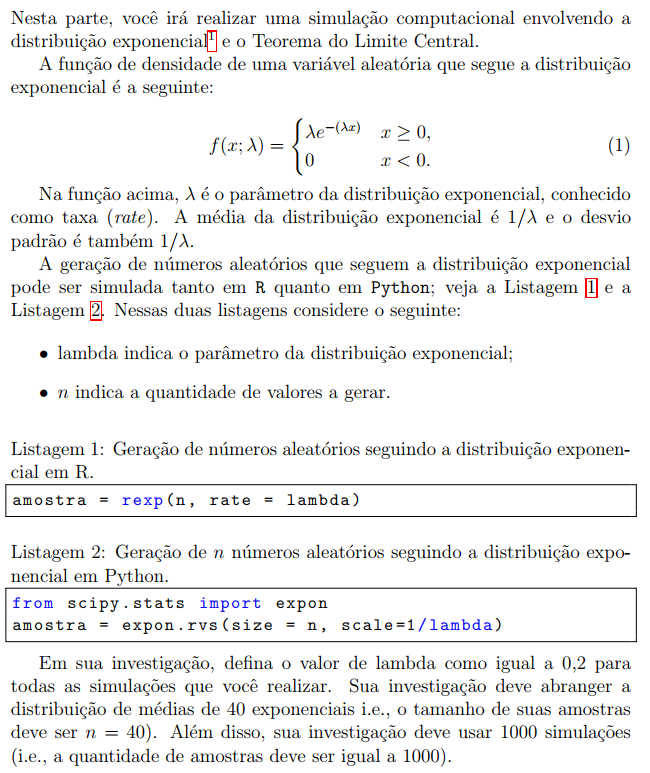

## **(i)**
Crie uma amostra de tamanho 1000 a partir da distribuição exponencial, usando λ = 0.2. Em seguida, crie um histograma com os elementos dessa amostra.

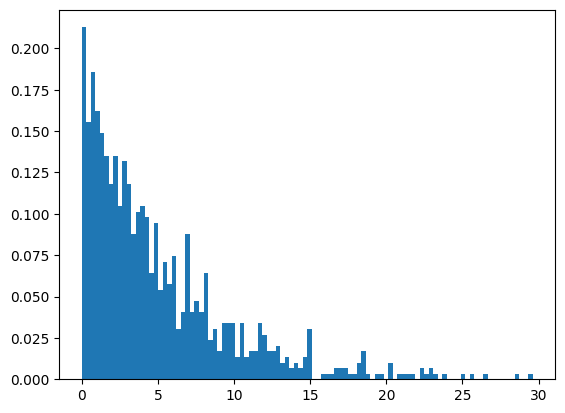

In [7]:
from matplotlib import pyplot
from scipy.stats import expon
from numpy.random import seed

seed(1)
lamb = 0.2
n = 1000
amostra = expon.rvs(size = n, scale = 1/lamb)
pyplot.hist(amostra, bins = 100, density=True)
pyplot.show()

**Explicação**

* Lambda recebe o valor 0,2.
* O tamanho da amostra é n, que recebe o valor 1000.
* É feita a geração de números aleatórios seguindo a distribuição exponencial com seed(1).
* É criado o histograma da distribuição com 100 intervalos e então é mostrado na tela.

## **(ii)**
Crie um histograma da distribuição amostral para a variável x, a média amostral (sampling distribution of the mean). Construa esse histograma usando os dados resultantes das 1000 simulações. O gráfico que você deve produzir deve ser semelhante ao apresentado na Figura 1. Como sugestão, use a biblioteca matplotlib (para a linguagem Python) ou a biblioteca ggplot (para a linguagem R) para produzir esse gráfico. Repare que, assim como a figura abaixo, seu gráfico deve mostrar que a distribuição amostral é aproximadamente normal.

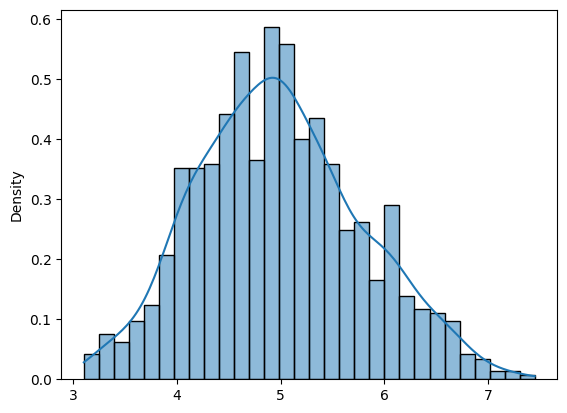

In [8]:
from matplotlib import pyplot
from scipy.stats import expon
from numpy.random import seed
import numpy as np
import seaborn as sns

seed(1)
lamb = 0.2
n = 40
simulacoes = []

for i in range(1000):
    amostra = expon.rvs(size = n, scale = 1/lamb)
    simulacoes.append(np.mean(amostra))

sns.histplot(simulacoes, kde=True, bins=30, stat='density');

**Explicação**

* Lambda recebe o valor 0,2.
* O tamanho da amostra é n, que recebe o valor 40.
* O array simulacoes irá guardar os dados resultantes das 1000 amostras calculadas no for loop.
* É feita a geração de números aleatórios seguindo a distribuição exponencial com seed(1) em um loop de 1000 iterações.
* É criado o histograma da distribuição com 30 intervalos e estimativa de densidade de kernel (KDE), por fim, o histograma é mostrado na tela.

## **(iii)**
Agora, calcule a média e variância aproximadas para a variável x e use o TLC para obter aproximações para a média e a variância da população subjacente. Os valores que você obteve são próximos aos valores teóricos? Explique.

In [9]:
import numpy as np

print("Média da amostra: ", np.mean(simulacoes))
print("Variância da amostra: ", np.var(simulacoes))
print("Média da população subjacente: ", 1/lamb)
print("Variância da população subjacente: ", (1/lamb)**2/n)

Média da amostra:  4.984163377101593
Variância da amostra:  0.6270157297660237
Média da população subjacente:  5.0
Variância da população subjacente:  0.625


**Explicação**

* É feita a média e a variância da amostra simulacoes.
* Depois é feita a média e a variância aproximada utilizando os valores de lambda e do tamanho da amostra.
* É possível visualizar que os valores teóricos de aproximação estão próximos dos valores encontrados na amostra simulacoes.

# **2) Distribuição Amostral da Média Amostral**

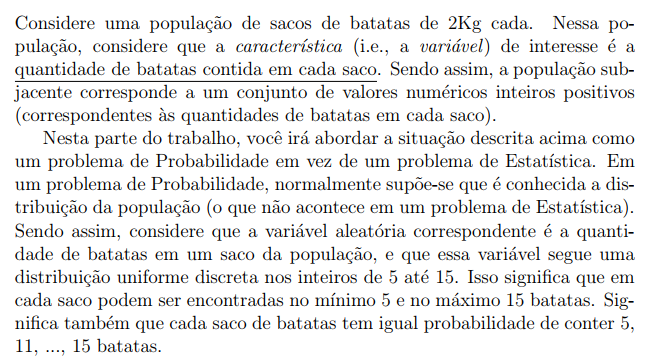
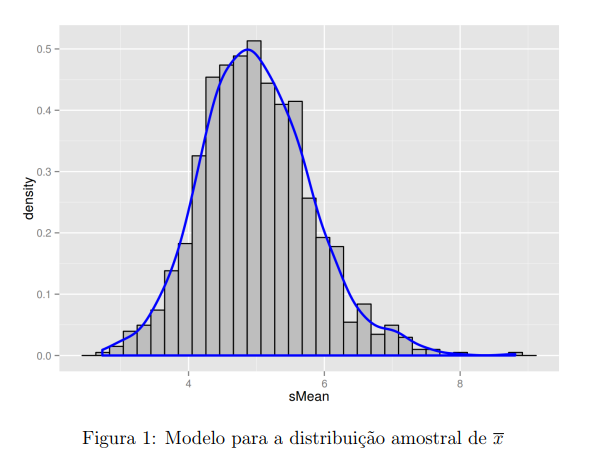

## **(i)**
Esboce um gráfico (histograma) da distribuição da população com relação à característica quantidade de batatas. Dica: observe que esta população é modelada por uma distribuição discreta uniforme. Veja detalhes nesta entrada da Wikipedia: https://en.wikipedia.org/wiki/Discrete_uniform_distribution.

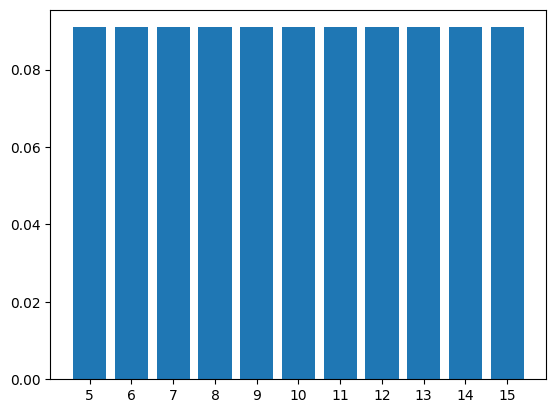

In [11]:
from matplotlib import pyplot

dados = list(range(5, 16))
probabilidade = 1/len(dados)

pyplot.bar(dados, probabilidade)
pyplot.gca().set_xticks(dados)
pyplot.show()

**Explicação**

* Registro os dados como sendo valores entre 5 e 15, representando o número de batats por saco.
* Depois registro a frequência dos dados, que é a mesma para todos.
* É gerado um histograma com os dados dos sacos de batatas e as frequências.
* Após isso, defino que apareça todos os valores do eixo x no gráfico e mostro na tela.

## **(ii)**
Encontre a média (µ), a variância (σ²) e o desvio padrão (σ) da distribuição da população. Dica: no mesmo link da Wikipedia fornecido no item acima, você encontra as fórmulas que você deve usar para computar os valores solicitados neste item.

In [21]:
import numpy as np

media_populacao = np.mean(dados)
variancia_populacao = np.var(dados)
desvio_populacao = np.sqrt(variancia_populacao)

print("Média da população:", media_populacao)
print("Variância da população:", variancia_populacao)
print("Desvio padrão da população:", desvio_populacao)

Média da população: 10.0
Variância da população: 10.0
Desvio padrão da população: 3.1622776601683795


**Explicação**

* É feita média, variância e desvio padrão dos dados usando funções do numpy.
* Os valores resultantes fazem sentido com o problema disposto.

## **(iii)**
Considere que o plano amostral utilizado é uma amostragem aleatória simples feita com substituição (simple random sample with replacement). Considere tomar amostras de tamanho 2 dessa população e calcular a média de cada amostra. Feito isso, para cada amostra, você vai ter calculado uma estatística pontual (point statistic) da variável x. Se você fizer isso para todas as possíveis amostras aleatórias de tamanho 2, a distribuição de todas as estatísticas pontuais resultantes é denominada distribuição amostral da média (sampling distribution of the sample mean) para n = 2. Para a maioria dos casos práticos, dada uma população, não é possível gerar todas as possíveis amostras (de determinado tamanho) dessa população. Entretanto, para este caso particular, isso é possível, porque a população é finita e pequena. Sendo assim, encontre essa distribuição aplicando os passos a seguir.
• Primeiro, implemente uma função para produzir a lista de todos os possíveis valores da estatística. Para isso, gere todas as amostras possíveis de n = 2 elementos. Uma amostra possível é o par (10, 10); outra amostra possível é o par (15, 12). Em seguida, para cada amostra gerada, compute a média de seus dois elementos. Por exemplo, para as duas amostras anteriores, as médias são 10 e 13,5, respectivamente. Repare que várias amostras diferentes geram o mesmo valor para a média. Por exemplo, as amostras (12, 15), (13, 14), (14, 13), (15, 12) todas geram a mesma média 13,5.
• Em seguida, usando o resultado da função acima, esboce um gráfico (histograma) da distribuição amostral de x̄.

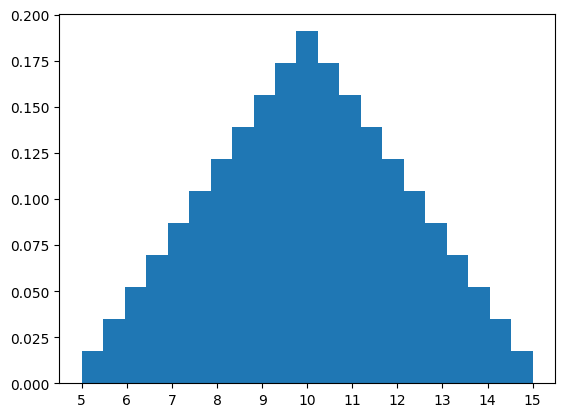

In [18]:
from matplotlib import pyplot

medias = []

for x in dados:
  for y in dados:
    media = (x + y)/2
    medias.append(media)

pyplot.hist(medias, bins=21, density=True)
pyplot.gca().set_xticks(dados)
pyplot.show()

**Explicação**

* Crio um array medias que armazenará as médias de todos os possíveis pares (n = 2).
* Combino todos os possíveis pares no for loop e guardo suas médias em medias.
* Crio um histograma com todas as médias entre os possíveis pares e densidades com 21 intervalos para melhor visualização e mostro na tela.

## **(iv)**
Encontre a média (µx), a variância (σx²) e o desvio padrão (σx) da distribuição amostral da média amostral para n = 2. Dica: Compute esses valores aplicando as funções numpy.mean e numpy.var em Python (ou mean e var em R). Aplique essas funções sobre a distribuição que você produziu no item (iii).

In [22]:
import numpy as np

media_amostra = np.mean(medias)
variancia_amostra = np.var(medias)
desvio_amostra = np.sqrt(variancia_amostra)

print("Média da amostra:", media_amostra)
print("Variância da amostra:", variancia_amostra)
print("Desvio padrão da amostra:", desvio_amostra)

Média da amostra: 10.0
Variância da amostra: 5.0
Desvio padrão da amostra: 2.23606797749979


**Explicação**

* É feita média, variância e desvio padrão dos possíveis pares da amostra usando funções do numpy.
* A distribuição amostral n já era n = 2 previamente.

## **(v)**
O Teorema do Limite Central apresenta uma teoria sobre os valores do desvio padrão e da média da distribuição amostral da média amostral x. Use essa teoria e os resultados do item (ii) acima para encontrar o desvio padrão e a média da distribuição amostral da média para n = 2. Como forma de validação, você deve encontrar os mesmos valores encontrados no item (iv).

In [23]:
import numpy as np

n = 2
media = media_populacao
variancia = variancia_populacao/n
desvio = np.sqrt(variancia)

print("Média:", media)
print("Variancia:", variancia)
print("Desvio padrão:", desvio)

Média: 10.0
Variancia: 5.0
Desvio padrão: 2.23606797749979


**Explicação**

* É feita média, variância e desvio padrão para distribuição amostral de n = 2.
* É possível visualizar que os valores obtidos são idênticos aos dos item iv.

## **(vi)**
Suponha, por um momento, que você não conhece a distribuição de probabilidades da população e que deseja estimar a média da população a partir de uma amostra de tamanho 2 tomada aleatoriamente dessa população. Qual estatística você calcularia sobre essa amostra para estimar a média da população? Você acha que essa estatística seria um bom estimador da população? Que outra estatística poderia ser um melhor estimador? Por quê?

**Resposta**

* Eu calcularia a média da amostra para definir a média da população.
* Essa abordagem, porém, não consegue ser precisa, pois o tamanho da amostra é muito pequeno e a média teria umuitas flutuações, por exemplo, caso um dos valores seja um outlier.
* Caso a amostra seja maior ou igual a 3, mas ainda pequena, sugiro o uso da mediana, pois é menos sensível a possíveis outliers. No caso da amostra de tamanho 2, a média e a mediana trazem o mesmo resultado.

## **(vii)**
Suponhamos que estivéssemos interessados na distribuição amostral da média para amostras de tamanho n = 9 e queiramos realizar os mesmos passos que em (iii) e (iv) acima.
(a) Para gerar a distribuição amostral teórica, teríamos que gerar todas as possíveis amostras de tamanho n = 9. Quantas amostras possíveis de tamanho n = 9 existem? Essa tarefa (gerar a distribuição amostral teórica neste caso) é factível de ser feita manualmente, ou mesmo usando um computador?
(b) Crie um histograma da distribuição amostral empírica (que é uma aproximação da distribuição amostral teórica). Dica: gere uma quantidade grande de amostras para obter uma aproximação adequada.

In [24]:
from itertools import permutations
n = 9
qntd_amostras = list(permutations(dados, n))
print("Quantidade de amostras:", len(qntd_amostras))

Quantidade de amostras: 19958400


**Explicação**

* Há muitas amostras a serem computadas, tornando o processo custoso. Sugiro usar a estatística para gerar dados aproximados com menos amostras.

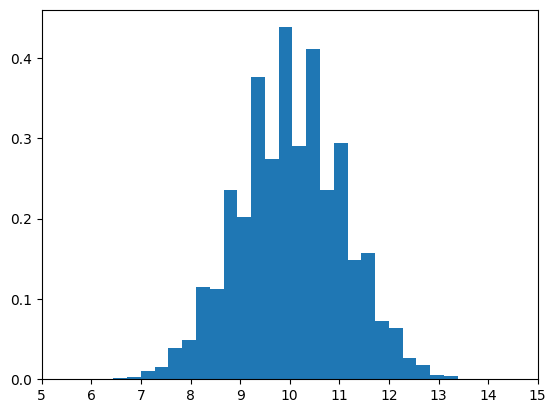

In [25]:
import numpy as np
from numpy.random import seed
from matplotlib import pyplot

seed(1)
n = 9
qntd_amostras = 100000
dados_populacao = list(range(5, 16))

amostras = np.random.choice(dados_populacao, size=(qntd_amostras, n))
media_amostras = np.mean(amostras, axis=1)

pyplot.hist(media_amostras, bins=30, density=True)
pyplot.gca().set_xticks(dados_populacao)
pyplot.show()

**Explicação**

* O tamanho amostral recebe o valor 9 e a quantidade de amostras foi aproximada para 100000.
* Os dados são os números entre 5 e 15.
* São escolhidas aleatóriamente amostras de tamanho 9 dentre as 100000 disponíveis e é calculada sua média.
* Após isso, os resultados são apresentados em um histograma com 30 intervalos.

# **3) Distribuição Amostral da Diferença de Médias**

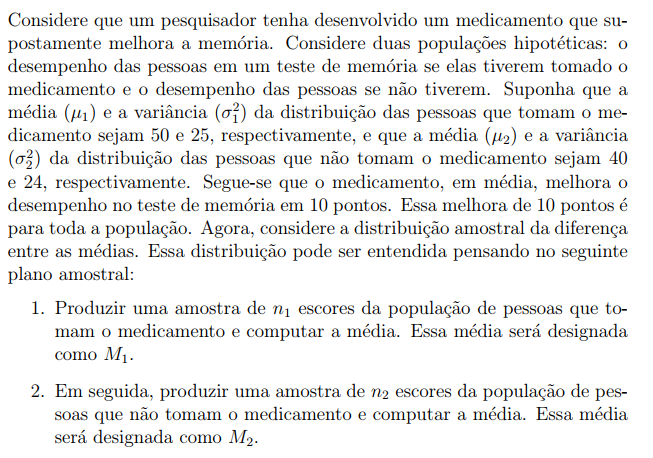
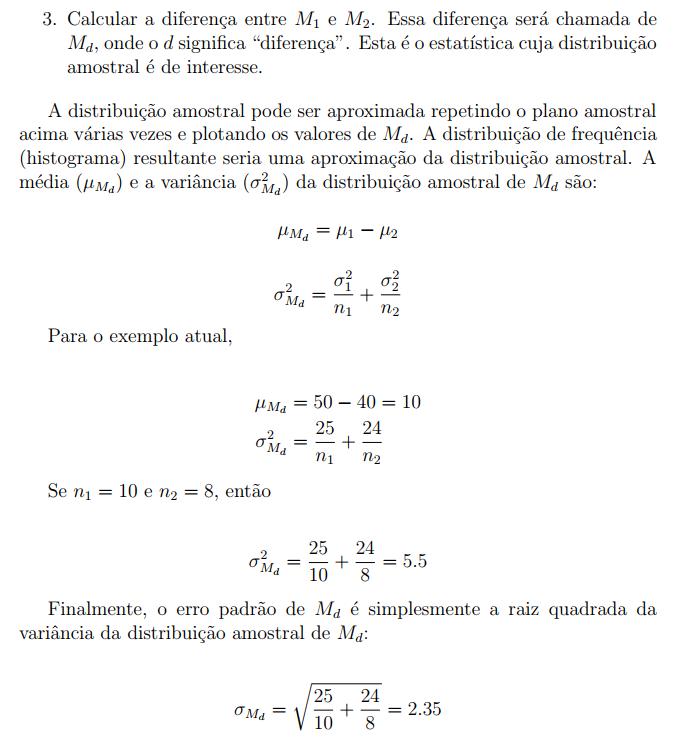

## **(i)**
Utilizando o plano amostral descrito acima, produza um histograma que aproxima a distribuição amostral de Md. Dica: repita os passos do plano amostral descrito 10.000 vezes. Em seguida, crie o histograma solicitado com os 10.000 valores produzidos.

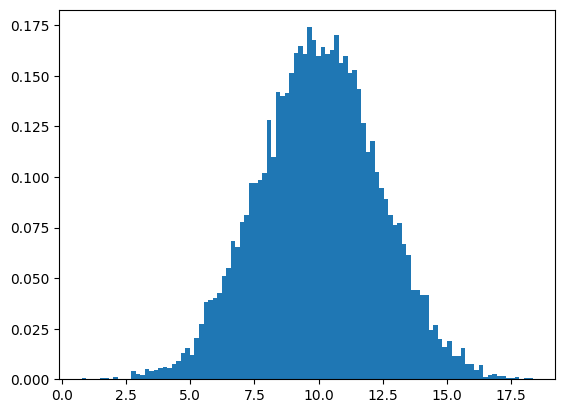

In [26]:
from matplotlib import pyplot
import numpy as np
from numpy.random import seed

seed(1)
qntd_amostras = 10000

media_pop_medicada = 50
variancia_pop_medicada = 25
desvio_pop_medicada = np.sqrt(variancia_pop_medicada)
n1 = 10
amostras_pop_medicada = np.random.normal(media_pop_medicada, desvio_pop_medicada, (qntd_amostras, n1))

media_pop_normal = 40
variancia_pop_normal = 24
desvio_pop_normal = np.sqrt(variancia_pop_normal)
n2 = 8
amostras_pop_normal = np.random.normal(media_pop_normal, desvio_pop_normal, (qntd_amostras, n2))

m1 = np.mean(amostras_pop_medicada, axis=1)
m2 = np.mean(amostras_pop_normal, axis=1)
md = m1 - m2

pyplot.hist(md, bins=100, density=True)
pyplot.show()

**Explicação**

* Defino a quantidade de amostras para 10000.
* Com a média e a variância oferecidas no enunciado, calculo o desvio padrão da população medicada e não medicada.
* São escolhidas aleatóriamente amostras de tamanho n1 e n2 dentre as 100000 disponíveis e é calculada suas médias.
* É efetuada a diferença das médias e o histograma é mostrado.

## **(ii)**
Usando a aproximação da distribuição amostral de Md obtida no item anterior, compute aproximações para a média e o desvio padrão dessa estatística. Os valores que você obteve são próximos aos fornecidos acima? Explique.

In [27]:
import numpy as np

md_media = np.mean(md)
md_variancia = np.var(md)
md_desvio = np.sqrt(md_variancia)

print("Média de Md:", md_media)
#print("Variância de Md:", md_variancia)
print("Desvio padrão de Md: ", md_desvio)

Média de Md: 10.014853064549431
Desvio padrão de Md:  2.3528830420448013


**Explicação**

* É calculado a média, variância e desvio padrão da distribuição amostral de Md utilizando funções do Numpy.
* Todos os valores são parecidos com os fornecidos no exercício. A aproximação é precisa.

## **(iii)**
Uma vez conhecida a média e o erro padrão da distribuição amostral de uma estatística, é possível responder a diversas perguntas. Para o caso da estatística aqui mencionada (diferença entre as médias), responda a seguinte pergunta: Se um experimento com o medicamento para a memória descrito for realizado, qual é a probabilidade de a média do grupo de 10 sujeitos que receberam o medicamento ser 15 ou mais pontos maior do que a média dos 8 sujeitos que não receberam o medicamento?

In [28]:
from scipy.stats import norm

z = (15 - md_media) / md_desvio
print("Valor de z:", z)
print("Probabilidade:", 1 - norm.cdf(z))

Valor de z: 2.1187397955480893
Probabilidade: 0.01705623159502423


**Explicação**

* É calculado o valor z.
* É impressa a probabilidade da média do grupo de 10 sujeitos que receberam o medicamento ser 15 ou mais pontos ser maior do que a média dos 8 sujeitos que não receberam o medicamento, utilizando 1 - norm.cdf(z), pois deseja-se a probabilidade à esquerda de z.

# **4) Intervalo de Confiança para Média Populacional**

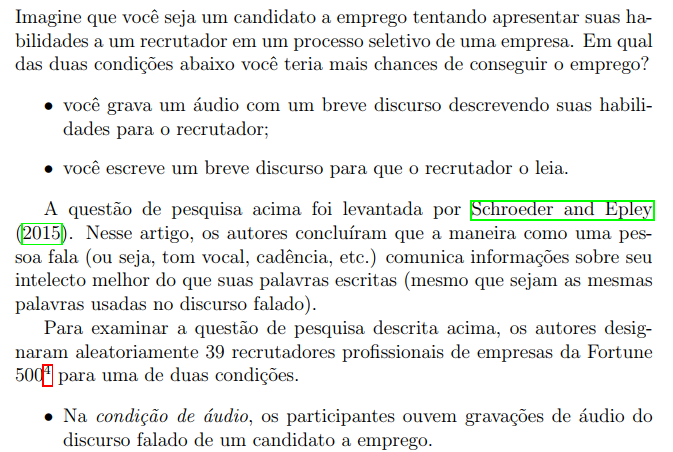
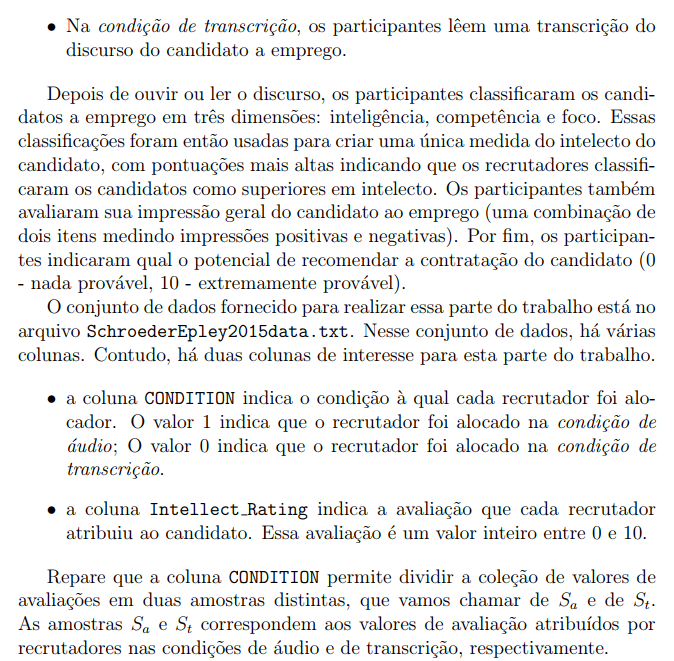

## **(i)**
Compute a média e o tamanho (quantidade de observações) tanto para Sa quanto St.

In [ ]:
import pandas as pd

df = pd.read_csv("SchroederEpley2015data.txt")
sa = df.loc[df["CONDITION"] == 1, "Intellect_Rating"]
st = df.loc[df["CONDITION"] == 0, "Intellect_Rating"]

media_sa = sa.mean()
media_st = st.mean()

tamanho_sa = sa.shape[0]
tamanho_st = st.shape[0]

print("Média da amostra com áudio:", media_sa)
print("Tamanho da amostra com áudio:", tamanho_sa)
print("Média da amostra com transcrição:", media_st)
print("Tamanho da amostra com transcrição:", tamanho_st)

Média da amostra com áudio: 5.634920634920636
Tamanho da amostra com áudio: 21
Média da amostra com transcrição: 3.6481481481481493
Tamanho da amostra com transcrição: 18


**Explicação**

* É feita a leitura da coluna CONDITION, sendo 1 para áudio e 0 para transcrição, e ambos são salvos.
* É feita a leitura e a média dos valores da coluna Intelect_Rating e seus valores são salvos.
* Calcula-se o tamanho de sa e st e os resultados são impressos.

## **(ii)**
Construa um boxplot para apresentar graficamente as duas amostras. Seu gráfico deve ser semelhante ao apresentado na Figura 2. Em Python, você pode usar a biblioteca Seaborn. Em R, você pode usar a biblioteca GGPLOT2. Forneça uma análise das informações fornecidas pelo gráfico.

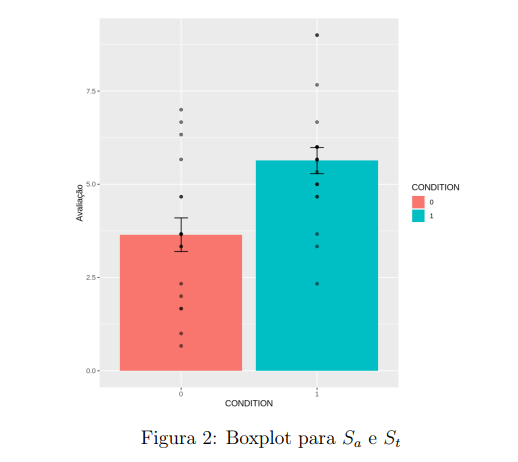

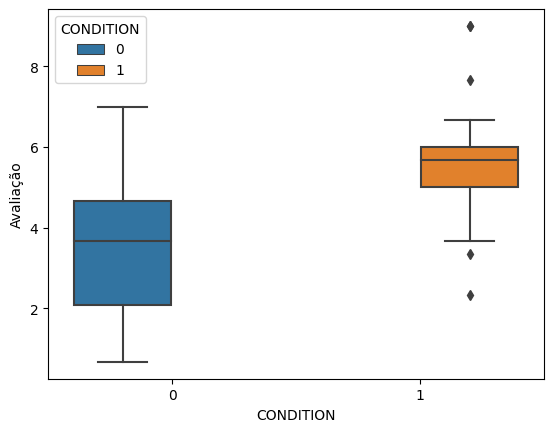

In [ ]:
import seaborn as sns
from matplotlib import pyplot

sns.boxplot(data=df, x="CONDITION", y="Intellect_Rating", hue="CONDITION");
pyplot.xlabel('CONDITION');
pyplot.ylabel('Avaliação');

**Explicação**

* É criado um boxplot com os dados das colunas CONDITION e Intelect_Rating, onde a coloração é definida pela CONDITION 0 ou 1.
* Após isso, crio legendas para os eixos x e y.

## **(iii)**
Aplique um teste de normalidade em ambas as amostras, Sa e St. Apresente uma análise do resultado obtido.

In [ ]:
from scipy.stats import shapiro

teste_sa, p_sa = shapiro(sa)
teste_st, p_st = shapiro(st)

print("Teste de Shapiro-Wilk\n")
print("p-valor do áudio:", p_sa)
print("p-valor da transcrição:", p_st)

Teste de Shapiro-Wilk

p-valor do áudio: 0.17365092039108276
p-valor da transcrição: 0.4447984993457794


**Explicação**

* Utilizo a função shapiro() para fazer um teste de normalidade em ambras as amostras.
* É impresso na tela o valor do teste e do p-valor para ambos áudio e transcrição.
* Como o p-valor é maior que o valor de significância (0.05 por padrão), não há evidências para rejeitar a hipótese nula, portanto, assume-se que as amostras seguem uma distribuição normal.

## **(iv)**
Construa um intervalo de confiança para a média de avaliações produzidas por duas populações distintas, P1 e P2, descritas abaixo.

• P1: todos os recrutadores que ouvem os áudios

• P2: todos os recrutadores que leem os transcritos

Note que a resposta a este item deve conter dois intervalos de confiança.
Nos dois casos, use o nível de confiança de 99%

In [ ]:
import scipy.stats as sts

desvio_sa = sa.std()
desvio_st = st.std()

alfa = 0.05
crit_sa = sts.t.ppf(1 - alfa/2, tamanho_sa - 1)
crit_st = sts.t.ppf(1 - alfa/2, tamanho_st - 1)

confianca_sa = [media_sa - crit_sa * desvio_sa / (tamanho_sa ** 0.5), media_sa + crit_sa * desvio_sa / (tamanho_sa ** 0.5)]
confianca_st = [media_st - crit_st * desvio_st / (tamanho_st ** 0.5), media_st + crit_st * desvio_st / (tamanho_st ** 0.5)]

print("Intervalo de confiança para a média de avaliações de P1: ", confianca_sa)
print("Intervalo de confiança para a média de avaliações de P2: ", confianca_st)

Intervalo de confiança para a média de avaliações de P1:  [4.90266120040634, 6.367180069434933]
Intervalo de confiança para a média de avaliações de P2:  [2.697659687713838, 4.598636608582461]


**Explicação**

* Calculo o desvio padrão de Sa e St.
* Defino o nível de significância para 0.05.
* Uso a distribuição t de Student para calcular os valores críticos, fazendo uso das fórmulas apresentadas em sala de aula.
* Por fim, calculo os intervalos de confiança de ambas amostras, fazendo uso de dados previamente calculados e das fórmulas apresentadas em sala de aula, e imprimo o resultado.


## **(v)**
Com base nos intervalos de confiança obtidos no item anterior, você
acha que a conclusão a que chegaram os autores em Schroeder and
Epley (2015) é válida? Justifique sua resposta.

**Resposta**

* É válida, pois o intervalo de confiança das avaliações de P1 (áudio) é significantemente maior que o de P2 (transcrição), indicando que as ideias são mais bem comunicadas por fala do que por escrita e corroborando com a conclusão dos autores.

# **5) Intervalo de Confiança para Média Populacional**

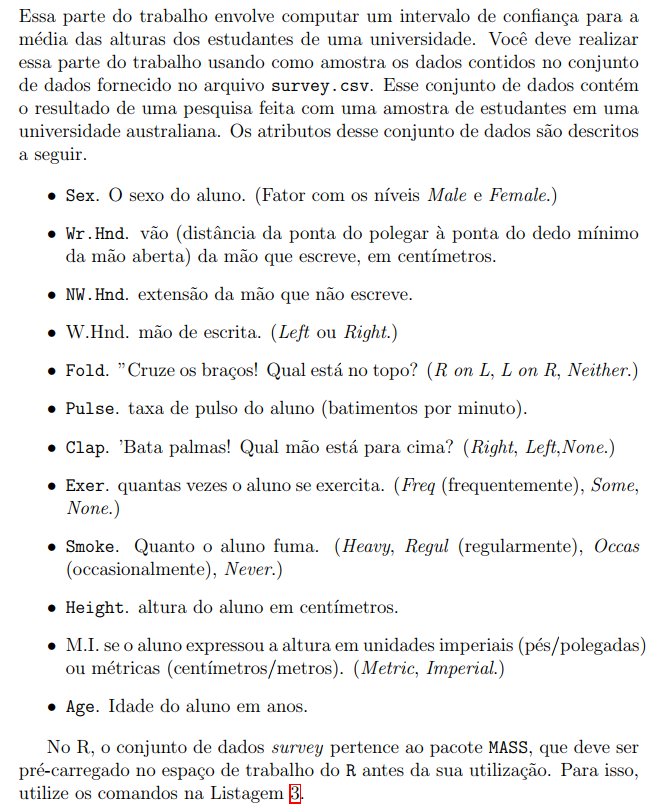
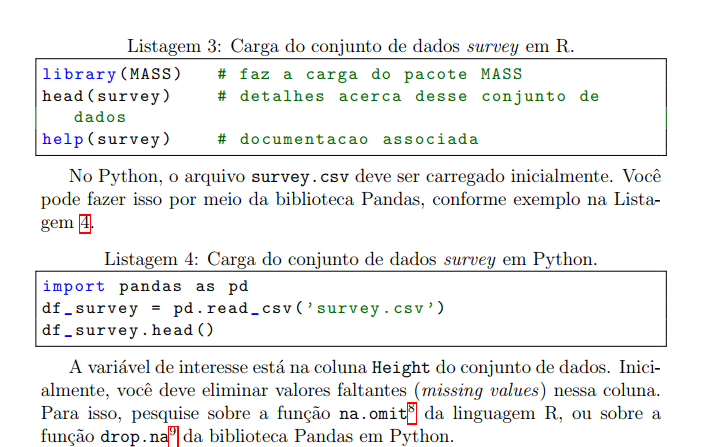

## **(i)**
Usando a distribuição t de Student, calcule um intervalo de confiança no nível de 95% para a altura média dos estudantes da universidade.

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

df_survey = pd.read_csv('survey.csv')
df_survey.head()
alturas = df_survey['Height'].dropna()

media_alturas = alturas.mean()
desvio_alturas = alturas.std(ddof=1)

n = len(alturas)
df = n - 1
alfa = 1 - 0.95

t_valor = stats.t.ppf(alfa/2, df)
erro_t = np.abs(t_valor * desvio_alturas/np.sqrt(n))

print("Intervalo de confiança:", (media_alturas - erro_t, media_alturas + erro_t))

Intervalo de confiança: (171.0379835685985, 173.7237389194398)


**Explicação**

* Leio o arquivo e armazeno a coluna Height, com exceção dos valores ausentes.
* Calculo a média e o desvio padrão das alturas.
* Defino o tamanho da amostra verificando quantas alturas existem, defino o grau de liberdade e uso nível de confiança em 95%.
* Calculo o t_valor do nível de confiança e o erro padrão.
* Em seguida mostro na tela o intervalo de confiança, subtraindo e somando o erro padrão à média.

## **(ii)**
Construa outro intervalo de confiança, desta vez usando o z-score (em vez do t-score que você usou anteriormente).

In [ ]:
from scipy import stats

z_valor = stats.norm.ppf((alfa/2))
erro_z = np.abs(z_valor * desvio_alturas / (n**0.5))
print("Intervalo de confiança:", (media_alturas - erro_z, media_alturas + erro_z))

Intervalo de confiança: (171.0457970215785, 173.7159254664598)


**Explicação**

* Calculo o z-valor utilizando stats.norm.ppf().
* Calculo o erro padrão utilizando o z_valor.
* Em seguida mostro na tela o intervalo de confiança, subtraindo e somando o erro padrão à média.

## **(iii)**
Apresente uma análise comparativa dos dois intervalos de confiança
obtidos.

**Resposta**

* Como o nível de confiança era de 95%, ambos métodos trouxeram resultados semelhantes.
* Caso seja uma amostra pequena (n < 30), os resultados podem divergir significantemente.

# **6) Intervalo de Confiança para Proporção Populacional**

Nesta parte do trabalho, você deve considerar a mesma amostra contida no conjunto de dados survey. Dessa vez, você deve produzir um intervalo de confiança para a proporção de alunos da universidade que são canhotos. Sendo assim, dessa vez a coluna de interesse é W.Hnd.

## **(i)**
Primeiramente, certifique-se de que existem pelo menos 10 estudantes destros e pelo menos 10 estudantes canhotos, para que você possa realizar a construção do intervalo de confiança de forma satisfatória.

In [ ]:
import pandas as pd

maos = df_survey['W.Hnd'].dropna()

destros = (maos == 'Right').sum()
canhotos = (maos == 'Left').sum()

print("Destros:", destros)
print("Canhotos:", canhotos)
print("Há destros e canhotos suficientes.") if destros >= 10 and canhotos >= 10 else print("Não há destros e canhotos suficientes.")

Destros: 218
Canhotos: 18
Há destros e canhotos suficientes.


**Explicação**

* Leio o arquivo e armazeno a coluna W.Hnd, com exceção dos valores ausentes.
* Faço a soma de todos os valores de quem usa a mão esquerda e a mão direita.
* Em seguida mostro na tela o número de destros e canhotos verifico se há pelo menos 10 de cada categoria.

## **(ii)**
Produza o intervalo de confiança solicitado, usando o nível de confiança
90%. Junto com o resultado, forneça também uma análise.

In [ ]:
import math
from scipy import stats

n = len(maos)
proporcao_canhotos = canhotos / n
alfa = 1 - 0.9
valor_critico = stats.norm.ppf(alfa/2)
erro = np.abs(math.sqrt((proporcao_canhotos * (1 - proporcao_canhotos)) / n) * valor_critico)

print("Intervalo com nível de confiança em 90%:", proporcao_canhotos - erro, proporcao_canhotos + erro)

Intervalo com nível de confiança em 90%: 0.04785120750559944 0.10469116537575651


**Explicação**

* Verifico quantos estudantes destros e canhotos existem.
* Calculo a proporção de estudantes canhotos.
* Defino o nível de confiança em 90% e calculo o valor crítico.
* Calculo o erro padrão, subtraio da proporção de canhotos para obter o intervalo de confiança e mostro os resultados.
* É possível assumir que cerca de 7,5% dos estudantes são canhotos, podendo variar entre 5% e 10%.

## **(iii)**
Produza o intervalo de confiança solicitado, usando o nível de confiança
95%. Junto com o resultado, forneça também uma análise e compare
com o resultado obtido no item anterior.

In [ ]:
from scipy import stats
import numpy as np

alfa = 1 - 0.95
valor_critico = stats.norm.ppf(alfa/2)
erro = np.abs(math.sqrt((proporcao_canhotos * (1 - proporcao_canhotos)) / n) * valor_critico)

print("Intervalo com nível de confiança em 95%:", proporcao_canhotos - erro, proporcao_canhotos + erro)

Intervalo com nível de confiança em 95%: 0.04240669282164528 0.11013568005971067


**Explicação**

* Defino o nível de confiança em 95% e calculo o valor crítico.
* Calculo o erro padrão, subtraio da proporção de canhotos para obter o intervalo de confiança e mostro os resultados.
* É possível assumir que cerca de 7,5% dos estudantes são canhotos, podendo variar entre 4% e 11%.
* Ao aumentar o nível de confiança, obtém-se intervalos mais amplos de possíveis valores, porém, isso resulta em uma estimativa menos precisa.

## **(iv)**
Repita os itens (i), (ii) e (iii), desta vez considerando o atributo Sex.

In [ ]:
from scipy import stats
import numpy as np

sexo = df_survey['Sex'].dropna()

masculino = (sexo == 'Male').sum()
feminino = (sexo == 'Female').sum()

print("Pessoas do sexo masculino:", masculino)
print("Pessoas do sexo feminino:", feminino)
print("Há pessoas suficientes de ambos sexos.") if masculino >= 10 and feminino >= 10 else print("Não há pessoas suficientes de ambos sexos.")

n = len(sexo)
proporcao_feminino = feminino / n
alfa = 1 - 0.9
valor_critico = stats.norm.ppf(alfa/2)
erro = np.abs(math.sqrt((proporcao_feminino * (1 - proporcao_feminino)) / n) * valor_critico)

print("Intervalo com nível de confiança em 90%:", proporcao_feminino - erro, proporcao_feminino + erro)

n = len(sexo)
proporcao_feminino = feminino / n
alfa = 1 - 0.95
valor_critico = stats.norm.ppf(alfa/2)
erro = np.abs(math.sqrt((proporcao_feminino * (1 - proporcao_feminino)) / n) * valor_critico)

print("Intervalo com nível de confiança em 95%:", proporcao_feminino - erro, proporcao_feminino + erro)

Pessoas do sexo masculino: 118
Pessoas do sexo feminino: 118
Há pessoas suficientes de ambos sexos.
Intervalo com nível de confiança em 90%: 0.44646457439608234 0.5535354256039177
Intervalo com nível de confiança em 95%: 0.43620860582277354 0.5637913941772265


**Explicação**

* Foram realizados os mesmos procedimentos dos itens anteriores, porém considerando a coluna Sex, classificando pessoas em sexo feminino e sexo masculino.

## **(v)**
A amostra correspondente ao conjunto de dados survey tem tamanho suficiente para produzir um intervalo de confiança para a característica Sexo (coluna Sexo) com um erro amostral de 2 pontos percentuais? Se sim, construa esse intervalo de confiança usando nível de confiança de 90%. Se não, explique.

In [ ]:
from scipy import stats

s = feminino / len(sexo)
alfa = 1 - 0.9
z = stats.norm.ppf(alfa/2)
E = 0.02

n = s**2 * z**2 / E**2
print("Tamanho da amostra em survey.csv:", len(sexo))
print("Tamanho mínimo da amostra:", n)

Tamanho da amostra em survey.csv: 236
Tamanho mínimo da amostra: 1690.9646588096343


**Explicação**

* Calculo a proporção da amostra, o alfa com 90% de nível de confiança, o valor crítico e defino erro amostral como 2%.
* Encontro o tamanho mínimo da amostra para obter um intervalo de confiança com 2% de erro amostral.
* É possível perceber que a amostra disposta em survey.csv é pequena demais para produzir um intervalo de confiança para a característica Sexo com um erro amostral de 2 pontos percentuais (236 < 1690)